In [118]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Make the graphs a bit prettier, and bigger
pd.set_option('display.mpl_style', 'default')

# This is necessary to show lots of columns in pandas 0.12. 
# Not necessary in pandas 0.13.
pd.set_option('display.width', 5000) 
pd.set_option('display.max_columns', 60)

plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.family'] = 'sans-serif'

/Users/wedrago/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2881: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)


In [84]:
broken_df = pd.read_csv('pandasdata/bikes.csv', encoding='latin1')

In [85]:
broken_df.head()

Date;Berri 1;Brébeuf (données non disponibles);Côte-Sainte-Catherine;Maisonneuve 1;Maisonneuve 2;du Parc;Pierre-Dupuy;Rachel1;St-Urbain (données non disponibles)
0                   01/01/2012;35;;0;38;51;26;10;16;                                                                                                               
1                   02/01/2012;83;;1;68;153;53;6;43;                                                                                                               
2                 03/01/2012;135;;2;104;248;89;3;58;                                                                                                               
3                04/01/2012;144;;1;116;318;111;8;61;                                                                                                               
4                05/01/2012;197;;2;124;330;97;13;95;

In [86]:
fixed_df = pd.read_csv('pandasdata/bikes.csv', encoding='latin1', sep=';', parse_dates=['Date'], dayfirst=True, index_col='Date')

In [87]:
fixed_df.head()

Berri 1  Brébeuf (données non disponibles)  Côte-Sainte-Catherine  Maisonneuve 1  Maisonneuve 2  du Parc  Pierre-Dupuy  Rachel1  St-Urbain (données non disponibles)
Date                                                                                                                                                                            
2012-01-01       35                                NaN                      0             38             51       26            10       16                                  NaN
2012-01-02       83                                NaN                      1             68            153       53             6       43                                  NaN
2012-01-03      135                                NaN                      2            104            248       89             3       58                                  NaN
2012-01-04      144                                NaN                      1            116            318      111             8       61                                  NaN
2012-01-05      197                                NaN                      2            124            330       97            13       95                                  NaN

In [88]:
fixed_df['Berri 1'].head()

Date
2012-01-01     35
2012-01-02     83
2012-01-03    135
2012-01-04    144
2012-01-05    197
Name: Berri 1, dtype: int64

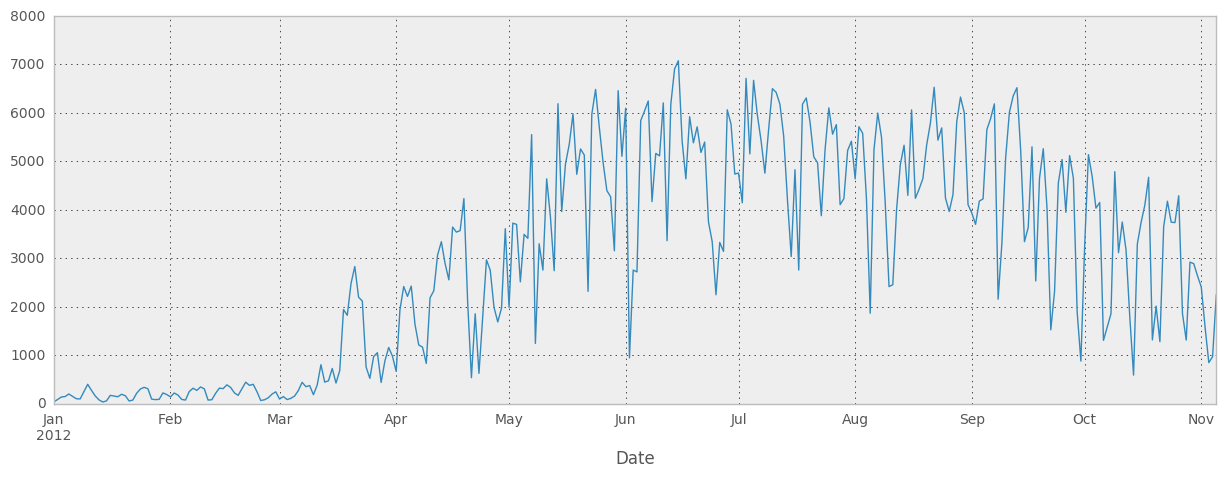

In [89]:
fixed_df['Berri 1'].plot()

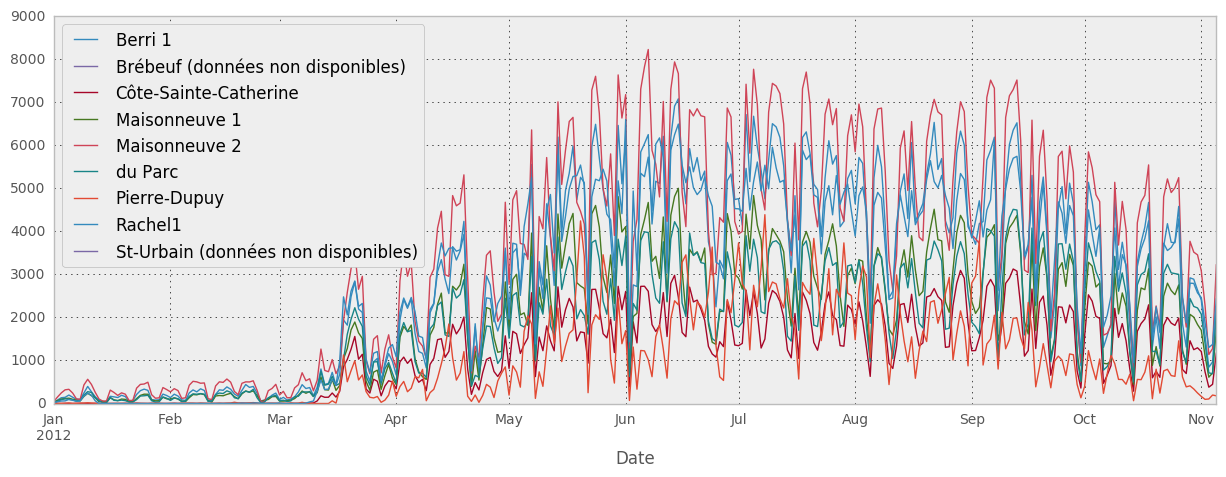

In [90]:
fixed_df.plot(figsize=(15, 5))

In [91]:
complaints = pd.read_csv('pandasdata/311-service-requests.csv')

/Users/wedrago/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [92]:
complaints.head()

Unique Key            Created Date             Closed Date Agency                              Agency Name           Complaint Type                    Descriptor        Location Type Incident Zip  Incident Address      Street Name   Cross Street 1                    Cross Street 2 Intersection Street 1 Intersection Street 2 Address Type      City Landmark Facility Type    Status                Due Date Resolution Action Updated Date Community Board    Borough  X Coordinate (State Plane)  Y Coordinate (State Plane) Park Facility Name Park Borough  School Name School Number School Region  School Code School Phone Number School Address  School City School State   School Zip School Not Found  School or Citywide Complaint Vehicle Type Taxi Company Borough Taxi Pick Up Location Bridge Highway Name Bridge Highway Direction Road Ramp Bridge Highway Segment Garage Lot Name Ferry Direction Ferry Terminal Name   Latitude  Longitude                                  Location
0    26589651  10/31/2013 02:08:41 AM                     NaN   NYPD          New York City Police Department  Noise - Street/Sidewalk                  Loud Talking      Street/Sidewalk        11432  90-03 169 STREET       169 STREET        90 AVENUE                         91 AVENUE                   NaN                   NaN      ADDRESS   JAMAICA      NaN      Precinct  Assigned  10/31/2013 10:08:41 AM         10/31/2013 02:35:17 AM       12 QUEENS     QUEENS                   1042027.0                    197389.0        Unspecified       QUEENS  Unspecified   Unspecified   Unspecified  Unspecified         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified                N                           NaN          NaN                  NaN                   NaN                 NaN                      NaN       NaN                    NaN             NaN             NaN                 NaN  40.708275 -73.791604   (40.70827532593202, -73.79160395779721)
1    26593698  10/31/2013 02:01:04 AM                     NaN   NYPD          New York City Police Department          Illegal Parking  Commercial Overnight Parking      Street/Sidewalk        11378         58 AVENUE        58 AVENUE         58 PLACE                         59 STREET                   NaN                   NaN    BLOCKFACE   MASPETH      NaN      Precinct      Open  10/31/2013 10:01:04 AM                            NaN       05 QUEENS     QUEENS                   1009349.0                    201984.0        Unspecified       QUEENS  Unspecified   Unspecified   Unspecified  Unspecified         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified                N                           NaN          NaN                  NaN                   NaN                 NaN                      NaN       NaN                    NaN             NaN             NaN                 NaN  40.721041 -73.909453  (40.721040535628305, -73.90945306791765)
2    26594139  10/31/2013 02:00:24 AM  10/31/2013 02:40:32 AM   NYPD          New York City Police Department       Noise - Commercial              Loud Music/Party  Club/Bar/Restaurant        10032     4060 BROADWAY         BROADWAY  WEST 171 STREET                   WEST 172 STREET                   NaN                   NaN      ADDRESS  NEW YORK      NaN      Precinct    Closed  10/31/2013 10:00:24 AM         10/31/2013 02:39:42 AM    12 MANHATTAN  MANHATTAN                   1001088.0                    246531.0        Unspecified    MANHATTAN  Unspecified   Unspecified   Unspecified  Unspecified         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified                N                           NaN          NaN                  NaN                   NaN                 NaN                      NaN       NaN                    NaN             NaN             NaN                 NaN  40.843330 -73.939144   (40.84332975466513, -73.93914371913482)
3    26595721  10/31/2013 01:56:23 AM  10/31/2013 02:21:48 AM   NYPD          New Y

In [93]:
complaints['Complaint Type']

0          Noise - Street/Sidewalk
1                  Illegal Parking
2               Noise - Commercial
3                  Noise - Vehicle
4                           Rodent
5               Noise - Commercial
6                 Blocked Driveway
7               Noise - Commercial
8               Noise - Commercial
9               Noise - Commercial
10        Noise - House of Worship
11              Noise - Commercial
12                 Illegal Parking
13                 Noise - Vehicle
14                          Rodent
15        Noise - House of Worship
16         Noise - Street/Sidewalk
17                 Illegal Parking
18          Street Light Condition
19              Noise - Commercial
20        Noise - House of Worship
21              Noise - Commercial
22                 Noise - Vehicle
23              Noise - Commercial
24                Blocked Driveway
25         Noise - Street/Sidewalk
26          Street Light Condition
27            Harboring Bees/Wasps
28         Noise - S

In [94]:
complaints[:5]

Unique Key            Created Date             Closed Date Agency                              Agency Name           Complaint Type                    Descriptor        Location Type Incident Zip  Incident Address      Street Name   Cross Street 1                    Cross Street 2 Intersection Street 1 Intersection Street 2 Address Type      City Landmark Facility Type    Status                Due Date Resolution Action Updated Date Community Board    Borough  X Coordinate (State Plane)  Y Coordinate (State Plane) Park Facility Name Park Borough  School Name School Number School Region  School Code School Phone Number School Address  School City School State   School Zip School Not Found  School or Citywide Complaint Vehicle Type Taxi Company Borough Taxi Pick Up Location Bridge Highway Name Bridge Highway Direction Road Ramp Bridge Highway Segment Garage Lot Name Ferry Direction Ferry Terminal Name   Latitude  Longitude                                  Location
0    26589651  10/31/2013 02:08:41 AM                     NaN   NYPD          New York City Police Department  Noise - Street/Sidewalk                  Loud Talking      Street/Sidewalk        11432  90-03 169 STREET       169 STREET        90 AVENUE                         91 AVENUE                   NaN                   NaN      ADDRESS   JAMAICA      NaN      Precinct  Assigned  10/31/2013 10:08:41 AM         10/31/2013 02:35:17 AM       12 QUEENS     QUEENS                   1042027.0                    197389.0        Unspecified       QUEENS  Unspecified   Unspecified   Unspecified  Unspecified         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified                N                           NaN          NaN                  NaN                   NaN                 NaN                      NaN       NaN                    NaN             NaN             NaN                 NaN  40.708275 -73.791604   (40.70827532593202, -73.79160395779721)
1    26593698  10/31/2013 02:01:04 AM                     NaN   NYPD          New York City Police Department          Illegal Parking  Commercial Overnight Parking      Street/Sidewalk        11378         58 AVENUE        58 AVENUE         58 PLACE                         59 STREET                   NaN                   NaN    BLOCKFACE   MASPETH      NaN      Precinct      Open  10/31/2013 10:01:04 AM                            NaN       05 QUEENS     QUEENS                   1009349.0                    201984.0        Unspecified       QUEENS  Unspecified   Unspecified   Unspecified  Unspecified         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified                N                           NaN          NaN                  NaN                   NaN                 NaN                      NaN       NaN                    NaN             NaN             NaN                 NaN  40.721041 -73.909453  (40.721040535628305, -73.90945306791765)
2    26594139  10/31/2013 02:00:24 AM  10/31/2013 02:40:32 AM   NYPD          New York City Police Department       Noise - Commercial              Loud Music/Party  Club/Bar/Restaurant        10032     4060 BROADWAY         BROADWAY  WEST 171 STREET                   WEST 172 STREET                   NaN                   NaN      ADDRESS  NEW YORK      NaN      Precinct    Closed  10/31/2013 10:00:24 AM         10/31/2013 02:39:42 AM    12 MANHATTAN  MANHATTAN                   1001088.0                    246531.0        Unspecified    MANHATTAN  Unspecified   Unspecified   Unspecified  Unspecified         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified                N                           NaN          NaN                  NaN                   NaN                 NaN                      NaN       NaN                    NaN             NaN             NaN                 NaN  40.843330 -73.939144   (40.84332975466513, -73.93914371913482)
3    26595721  10/31/2013 01:56:23 AM  10/31/2013 02:21:48 AM   NYPD          New Y

In [95]:
complaints[['Complaint Type', 'Agency']][:5]

Complaint Type Agency
0  Noise - Street/Sidewalk   NYPD
1          Illegal Parking   NYPD
2       Noise - Commercial   NYPD
3          Noise - Vehicle   NYPD
4                   Rodent  DOHMH

In [96]:
complaints_count = complaints['Complaint Type'].value_counts()

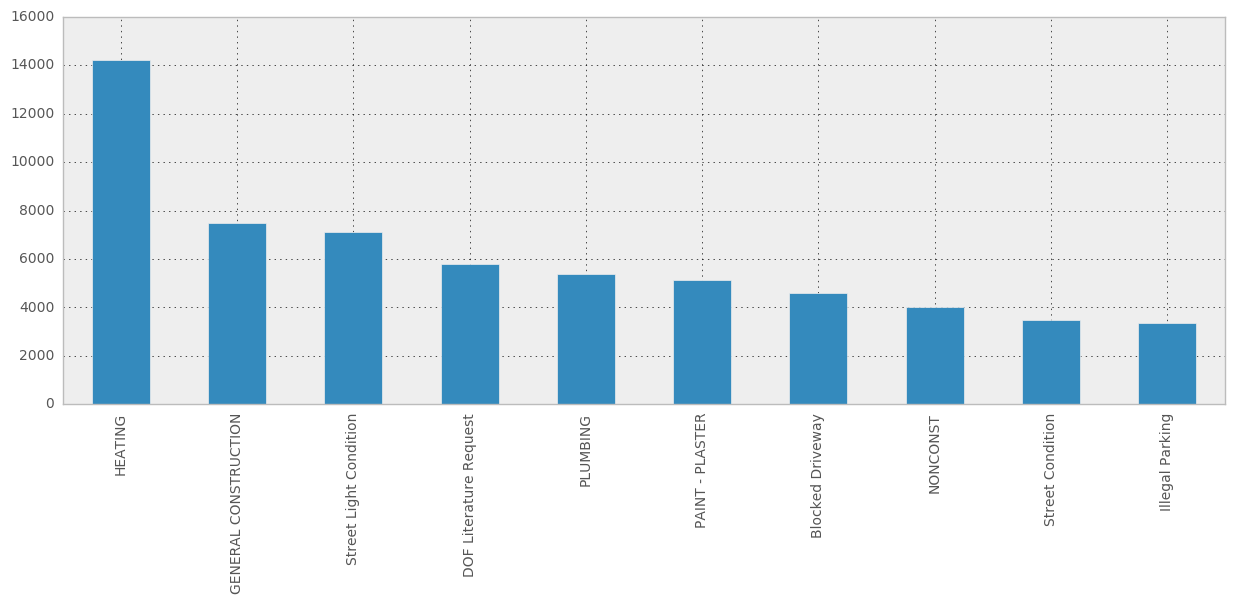

In [97]:
complaints_count[:10].plot(kind='bar')

In [98]:
noise_complaints = complaints[complaints['Complaint Type'] == 'Noise - Street/Sidewalk']
noise_complaints[:3]

Unique Key            Created Date             Closed Date Agency                      Agency Name           Complaint Type        Descriptor    Location Type Incident Zip     Incident Address      Street Name    Cross Street 1 Cross Street 2 Intersection Street 1 Intersection Street 2 Address Type           City Landmark Facility Type    Status                Due Date Resolution Action Updated Date   Community Board        Borough  X Coordinate (State Plane)  Y Coordinate (State Plane) Park Facility Name   Park Borough  School Name School Number School Region  School Code School Phone Number School Address  School City School State   School Zip School Not Found  School or Citywide Complaint Vehicle Type Taxi Company Borough Taxi Pick Up Location Bridge Highway Name Bridge Highway Direction Road Ramp Bridge Highway Segment Garage Lot Name Ferry Direction Ferry Terminal Name   Latitude  Longitude                                 Location
0     26589651  10/31/2013 02:08:41 AM                     NaN   NYPD  New York City Police Department  Noise - Street/Sidewalk      Loud Talking  Street/Sidewalk        11432     90-03 169 STREET       169 STREET         90 AVENUE      91 AVENUE                   NaN                   NaN      ADDRESS        JAMAICA      NaN      Precinct  Assigned  10/31/2013 10:08:41 AM         10/31/2013 02:35:17 AM         12 QUEENS         QUEENS                   1042027.0                    197389.0        Unspecified         QUEENS  Unspecified   Unspecified   Unspecified  Unspecified         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified                N                           NaN          NaN                  NaN                   NaN                 NaN                      NaN       NaN                    NaN             NaN             NaN                 NaN  40.708275 -73.791604  (40.70827532593202, -73.79160395779721)
16    26594086  10/31/2013 12:54:03 AM  10/31/2013 02:16:39 AM   NYPD  New York City Police Department  Noise - Street/Sidewalk  Loud Music/Party  Street/Sidewalk        10310  173 CAMPBELL AVENUE  CAMPBELL AVENUE  HENDERSON AVENUE   WINEGAR LANE                   NaN                   NaN      ADDRESS  STATEN ISLAND      NaN      Precinct    Closed  10/31/2013 08:54:03 AM         10/31/2013 02:07:14 AM  01 STATEN ISLAND  STATEN ISLAND                    952013.0                    171076.0        Unspecified  STATEN ISLAND  Unspecified   Unspecified   Unspecified  Unspecified         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified                N                           NaN          NaN                  NaN                   NaN                 NaN                      NaN       NaN                    NaN             NaN             NaN                 NaN  40.636182 -74.116150   (40.63618202176914, -74.1161500428337)
25    26591573  10/31/2013 12:35:18 AM  10/31/2013 02:41:35 AM   NYPD  New York City Police Department  Noise - Street/Sidewalk      Loud Talking  Street/Sidewalk        10312    24 PRINCETON LANE   PRINCETON LANE     HAMPTON GREEN       DEAD END                   NaN                   NaN      ADDRESS  STATEN ISLAND      NaN      Precinct    Closed  10/31/2013 08:35:18 AM         10/31/2013 01:45:17 AM  03 STATEN ISLAND  STATEN ISLAND                    929577.0                    140964.0        Unspecified  STATEN ISLAND  Unspecified   Unspecified   Unspecified  Unspecified         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified                N                           NaN          NaN                  NaN                   NaN                 NaN                      NaN       NaN                    NaN             NaN             NaN                 NaN  40.553421 -74.196743  (40.55342078716953, -74.19674315017886)

In [99]:
complaints['Complaint Type'] == 'Noise - Street/Sidewalk'

0          True
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16         True
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25         True
26        False
27        False
28         True
29        False
          ...  
111039    False
111040    False
111041    False
111042     True
111043    False
111044     True
111045    False
111046    False
111047    False
111048     True
111049    False
111050    False
111051    False
111052    False
111053    False
111054     True
111055    False
111056    False
111057    False
111058    False
111059     True
111060    False
111061    False
111062    False
111063    False
111064    False
111065    False
111066     True
111067    False
111068    False
Name: Complaint Type, dt

In [100]:
is_noise = complaints['Complaint Type'] == "Noise - Street/Sidewalk"
in_brooklyn = complaints['Borough'] == "BROOKLYN"
complaints[is_noise & in_brooklyn][:5]

Unique Key            Created Date             Closed Date Agency                      Agency Name           Complaint Type        Descriptor    Location Type Incident Zip    Incident Address      Street Name     Cross Street 1  Cross Street 2 Intersection Street 1 Intersection Street 2  Address Type      City Landmark Facility Type  Status                Due Date Resolution Action Updated Date Community Board   Borough  X Coordinate (State Plane)  Y Coordinate (State Plane) Park Facility Name Park Borough  School Name School Number School Region  School Code School Phone Number School Address  School City School State   School Zip School Not Found  School or Citywide Complaint Vehicle Type Taxi Company Borough Taxi Pick Up Location Bridge Highway Name Bridge Highway Direction Road Ramp Bridge Highway Segment Garage Lot Name Ferry Direction Ferry Terminal Name   Latitude  Longitude                                  Location
31     26595564  10/31/2013 12:30:36 AM                     NaN   NYPD  New York City Police Department  Noise - Street/Sidewalk  Loud Music/Party  Street/Sidewalk        11236            AVENUE J         AVENUE J     EAST 80 STREET  EAST 81 STREET                   NaN                   NaN     BLOCKFACE  BROOKLYN      NaN      Precinct    Open  10/31/2013 08:30:36 AM                            NaN     18 BROOKLYN  BROOKLYN                   1008937.0                    170310.0        Unspecified     BROOKLYN  Unspecified   Unspecified   Unspecified  Unspecified         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified                N                           NaN          NaN                  NaN                   NaN                 NaN                      NaN       NaN                    NaN             NaN             NaN                 NaN  40.634104 -73.911055  (40.634103775951736, -73.91105541883589)
49     26595553  10/31/2013 12:05:10 AM  10/31/2013 02:43:43 AM   NYPD  New York City Police Department  Noise - Street/Sidewalk      Loud Talking  Street/Sidewalk        11225  25 LEFFERTS AVENUE  LEFFERTS AVENUE  WASHINGTON AVENUE  BEDFORD AVENUE                   NaN                   NaN       ADDRESS  BROOKLYN      NaN      Precinct  Closed  10/31/2013 08:05:10 AM         10/31/2013 01:29:29 AM     09 BROOKLYN  BROOKLYN                    995366.0                    180388.0        Unspecified     BROOKLYN  Unspecified   Unspecified   Unspecified  Unspecified         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified                N                           NaN          NaN                  NaN                   NaN                 NaN                      NaN       NaN                    NaN             NaN             NaN                 NaN  40.661793 -73.959934    (40.6617931276793, -73.95993363978067)
109    26594653  10/30/2013 11:26:32 PM  10/31/2013 12:18:54 AM   NYPD  New York City Police Department  Noise - Street/Sidewalk  Loud Music/Party  Street/Sidewalk        11222                 NaN              NaN                NaN             NaN         DOBBIN STREET         NORMAN STREET  INTERSECTION  BROOKLYN      NaN      Precinct  Closed  10/31/2013 07:26:32 AM         10/31/2013 12:18:54 AM     01 BROOKLYN  BROOKLYN                    996925.0                    203271.0        Unspecified     BROOKLYN  Unspecified   Unspecified   Unspecified  Unspecified         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified                N                           NaN          NaN                  NaN                   NaN                 NaN                      NaN       NaN                    NaN             NaN             NaN                 NaN  40.724600 -73.954271  (40.724599563793525, -73.95427134534344)
236    26591992  10/30/2013 10:02:58 PM  10/30/2013 10:23:20 PM   NYPD  New York City Police Department  Noise - Street/Sidewalk      Loud Talking  Street/Sidewalk        11218       DITMAS AVENUE    DITMAS AVENUE                NaN     

In [101]:
noise_complaints_count = noise_complaints['Borough'].value_counts()
complaints_count = complaints['Borough'].value_counts()
(noise_complaints_count/complaints_count.astype(float)).plot(kind='bar')

In [102]:
bikes = pd.read_csv('pandasdata/bikes.csv', encoding='latin1', sep=';', parse_dates=['Date'], dayfirst=True, index_col='Date')
berri_bikes = bikes[['Berri 1']].copy()

In [103]:
berri_bikes[:5].index

DatetimeIndex(['2012-01-01', '2012-01-02', '2012-01-03', '2012-01-04', '2012-01-05'], dtype='datetime64[ns]', name='Date', freq=None)

In [104]:
berri_bikes.index.weekday

array([6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
       1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5,
       6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0,
       1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2,
       3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4,
       5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6,
       0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1,
       2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3, 4, 5, 6, 0, 1, 2, 3,
       4, 5,

In [105]:
berri_bikes.loc[:,'Weekday'] = berri_bikes.index.weekday

In [106]:
berri_bikes.head()

Berri 1  Weekday
Date                        
2012-01-01       35        6
2012-01-02       83        0
2012-01-03      135        1
2012-01-04      144        2
2012-01-05      197        3

In [107]:
weekday_counts = berri_bikes.groupby('Weekday').aggregate(sum)
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts

Berri 1
Monday      134298
Tuesday     135305
Wednesday   152972
Thursday    160131
Friday      141771
Saturday    101578
Sunday       99310

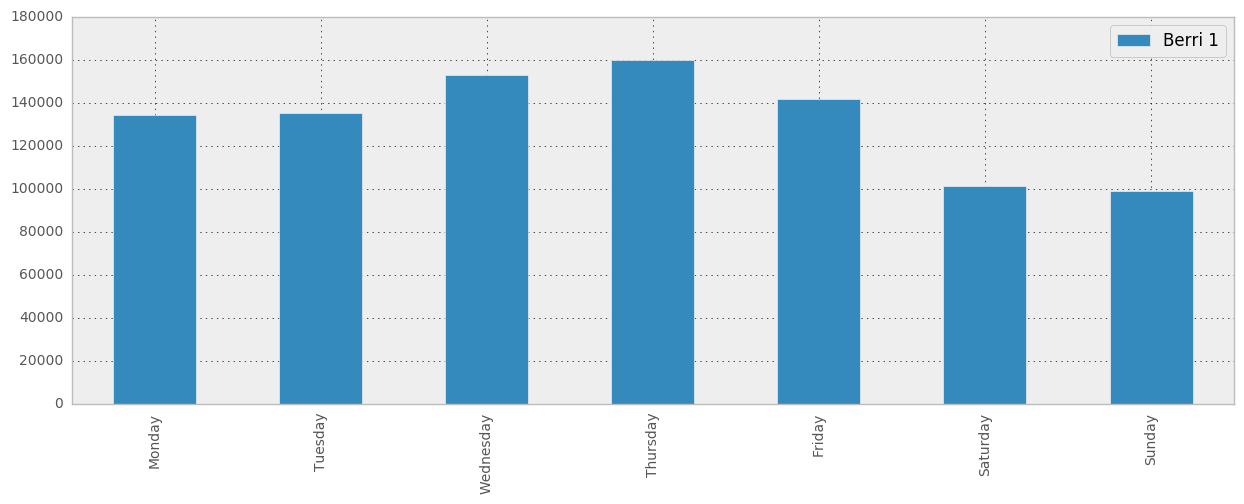

In [108]:
weekday_counts.plot(kind='bar')

In [110]:
weather_2012 = pd.read_csv('pandasdata/weather_2012.csv', parse_dates=True, index_col='Date/Time')
weather_2012[:5vvv

Temp (C)  Dew Point Temp (C)  Rel Hum (%)  Wind Spd (km/h)  Visibility (km)  Stn Press (kPa)               Weather
Date/Time                                                                                                                              
2012-01-01 00:00:00      -1.8                -3.9           86                4              8.0           101.24                   Fog
2012-01-01 01:00:00      -1.8                -3.7           87                4              8.0           101.24                   Fog
2012-01-01 02:00:00      -1.8                -3.4           89                7              4.0           101.26  Freezing Drizzle,Fog
2012-01-01 03:00:00      -1.5                -3.2           88                6              4.0           101.27  Freezing Drizzle,Fog
2012-01-01 04:00:00      -1.5                -3.3           88                7              4.8           101.23                   Fog

In [115]:
weather_description = weather_2012['Weather']
is_snowing = weather_description.str.contains('Snow')
is_snowing[:5]

Date/Time
2012-01-01 00:00:00    False
2012-01-01 01:00:00    False
2012-01-01 02:00:00    False
2012-01-01 03:00:00    False
2012-01-01 04:00:00    False
Name: Weather, dtype: bool

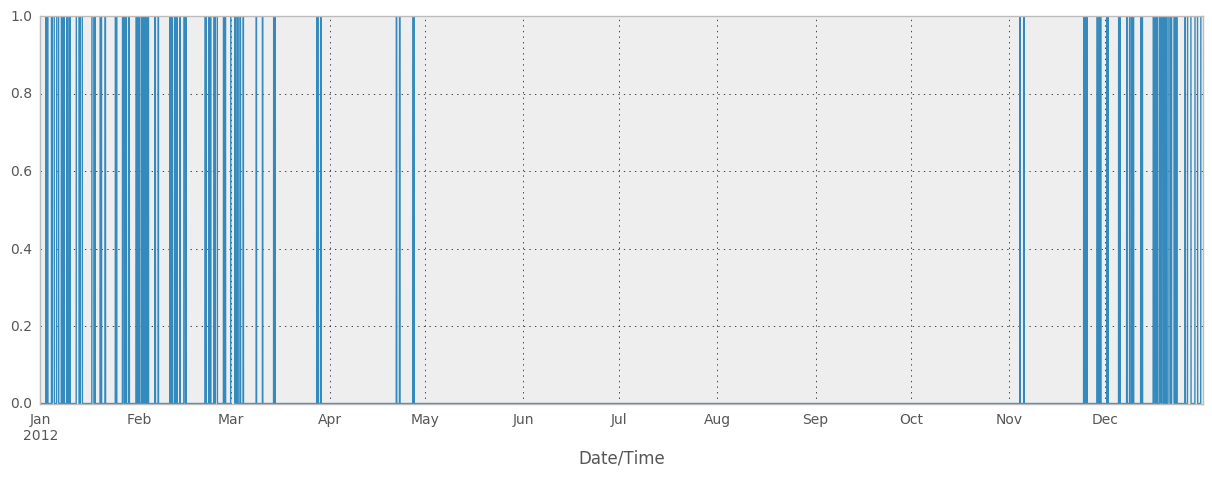

In [116]:
is_snowing.plot()

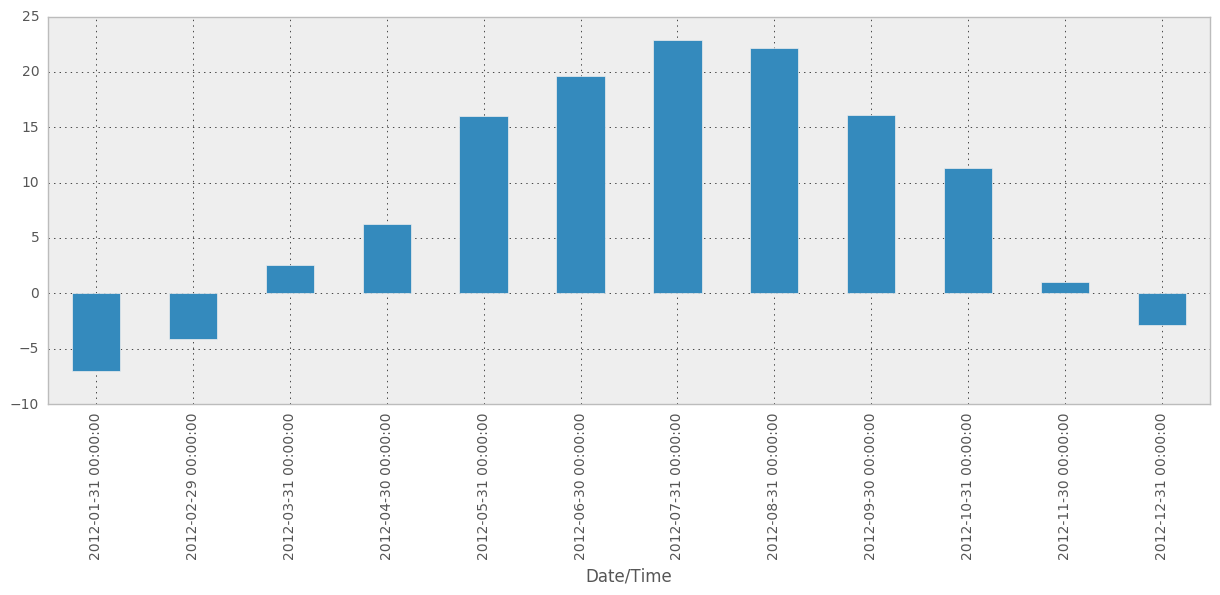

In [126]:
weather_2012['Temp (C)'].resample('M').apply(np.median).plot(kind='bar')

In [128]:
is_snowing.astype(float).resample('M').apply(np.mean)

Date/Time
2012-01-31    0.240591
2012-02-29    0.162356
2012-03-31    0.087366
2012-04-30    0.015278
2012-05-31    0.000000
2012-06-30    0.000000
2012-07-31    0.000000
2012-08-31    0.000000
2012-09-30    0.000000
2012-10-31    0.000000
2012-11-30    0.038889
2012-12-31    0.251344
Freq: M, Name: Weather, dtype: float64

In [129]:
is_snowing.astype(float).resample('M').apply(np.mean).plot(kind='bar')

In [131]:
temp = weather_2012['Temp (C)'].resample('M').apply(np.median)
snowiness = is_snowing.astype(float).resample('M').apply(np.mean)
# Name the columns
temp.name = "Temperature"
snowiness.name = "Snowiness"

In [133]:
stat = pd.concat([temp, snowiness], axis=1)
stat

Temperature  Snowiness
Date/Time                         
2012-01-31        -7.05   0.240591
2012-02-29        -4.10   0.162356
2012-03-31         2.60   0.087366
2012-04-30         6.30   0.015278
2012-05-31        16.05   0.000000
2012-06-30        19.60   0.000000
2012-07-31        22.90   0.000000
2012-08-31        22.20   0.000000
2012-09-30        16.10   0.000000
2012-10-31        11.30   0.000000
2012-11-30         1.05   0.038889
2012-12-31        -2.85   0.251344

In [136]:
stat.plot(kind='bar',subplots=True, figsize=(15, 10))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x126838438>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x127368160>], dtype=object)

In [138]:
requests = complaints.copy()

In [140]:
requests['Incident Zip'].unique()

array([11432.0, 11378.0, 10032.0, 10023.0, 10027.0, 11372.0, 11419.0,
       11417.0, 10011.0, 11225.0, 11218.0, 10003.0, 10029.0, 10466.0,
       11219.0, 10025.0, 10310.0, 11236.0, nan, 10033.0, 11216.0, 10016.0,
       10305.0, 10312.0, 10026.0, 10309.0, 10036.0, 11433.0, 11235.0,
       11213.0, 11379.0, 11101.0, 10014.0, 11231.0, 11234.0, 10457.0,
       10459.0, 10465.0, 11207.0, 10002.0, 10034.0, 11233.0, 10453.0,
       10456.0, 10469.0, 11374.0, 11221.0, 11421.0, 11215.0, 10007.0,
       10019.0, 11205.0, 11418.0, 11369.0, 11249.0, 10005.0, 10009.0,
       11211.0, 11412.0, 10458.0, 11229.0, 10065.0, 10030.0, 11222.0,
       10024.0, 10013.0, 11420.0, 11365.0, 10012.0, 11214.0, 11212.0,
       10022.0, 11232.0, 11040.0, 11226.0, 10281.0, 11102.0, 11208.0,
       10001.0, 10472.0, 11414.0, 11223.0, 10040.0, 11220.0, 11373.0,
       11203.0, 11691.0, 11356.0, 10017.0, 10452.0, 10280.0, 11217.0,
       10031.0, 11201.0, 11358.0, 10128.0, 11423.0, 10039.0, 10010.0,
       11209.0,

In [141]:
na_values = ['NO CLUE', 'N/A', '0']
requests = pd.read_csv('pandasdata/311-service-requests.csv', na_values=na_values, dtype={'Incident Zip':str})

In [142]:
requests['Incident Zip'].unique()

array(['11432', '11378', '10032', '10023', '10027', '11372', '11419',
       '11417', '10011', '11225', '11218', '10003', '10029', '10466',
       '11219', '10025', '10310', '11236', nan, '10033', '11216', '10016',
       '10305', '10312', '10026', '10309', '10036', '11433', '11235',
       '11213', '11379', '11101', '10014', '11231', '11234', '10457',
       '10459', '10465', '11207', '10002', '10034', '11233', '10453',
       '10456', '10469', '11374', '11221', '11421', '11215', '10007',
       '10019', '11205', '11418', '11369', '11249', '10005', '10009',
       '11211', '11412', '10458', '11229', '10065', '10030', '11222',
       '10024', '10013', '11420', '11365', '10012', '11214', '11212',
       '10022', '11232', '11040', '11226', '10281', '11102', '11208',
       '10001', '10472', '11414', '11223', '10040', '11220', '11373',
       '11203', '11691', '11356', '10017', '10452', '10280', '11217',
       '10031', '11201', '11358', '10128', '11423', '10039', '10010',
       '11209',

In [143]:
rows_with_dashes = requests['Incident Zip'].str.contains('-').fillna(False)

In [148]:
requests[rows_with_dashes]

Unique Key            Created Date             Closed Date Agency                     Agency Name      Complaint Type         Descriptor Location Type Incident Zip        Incident Address         Street Name Cross Street 1 Cross Street 2 Intersection Street 1 Intersection Street 2 Address Type        City Landmark Facility Type    Status                Due Date Resolution Action Updated Date Community Board      Borough  X Coordinate (State Plane)  Y Coordinate (State Plane) Park Facility Name Park Borough  School Name School Number School Region  School Code School Phone Number School Address  School City School State   School Zip School Not Found  School or Citywide Complaint Vehicle Type Taxi Company Borough Taxi Pick Up Location Bridge Highway Name Bridge Highway Direction Road Ramp Bridge Highway Segment Garage Lot Name Ferry Direction Ferry Terminal Name  Latitude  Longitude Location
29136    26550551  10/24/2013 06:16:34 PM                     NaN    DCA  Department of Consumer Affairs  Consumer Complaint  False Advertising           NaN   77092-2016   2700 EAST SELTICE WAY    EAST SELTICE WAY            NaN            NaN                   NaN                   NaN          NaN     HOUSTON      NaN           NaN  Assigned  11/13/2013 11:15:20 AM         10/29/2013 11:16:16 AM   0 Unspecified  Unspecified                         NaN                         NaN        Unspecified  Unspecified  Unspecified   Unspecified   Unspecified  Unspecified         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified                N                           NaN          NaN                  NaN                   NaN                 NaN                      NaN       NaN                    NaN             NaN             NaN                 NaN       NaN        NaN      NaN
30939    26548831  10/24/2013 09:35:10 AM                     NaN    DCA  Department of Consumer Affairs  Consumer Complaint         Harassment           NaN   55164-0737          P.O. BOX 64437               64437            NaN            NaN                   NaN                   NaN          NaN    ST. PAUL      NaN           NaN  Assigned  11/13/2013 02:30:21 PM         10/29/2013 02:31:06 PM   0 Unspecified  Unspecified                         NaN                         NaN        Unspecified  Unspecified  Unspecified   Unspecified   Unspecified  Unspecified         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified                N                           NaN          NaN                  NaN                   NaN                 NaN                      NaN       NaN                    NaN             NaN             NaN                 NaN       NaN        NaN      NaN
70539    26488417  10/15/2013 03:40:33 PM                     NaN    TLC   Taxi and Limousine Commission      Taxi Complaint   Driver Complaint        Street   11549-3650  365 HOFSTRA UNIVERSITY  HOFSTRA UNIVERSITY            NaN            NaN                   NaN                   NaN          NaN    HEMSTEAD      NaN           NaN  Assigned  11/30/2013 01:20:33 PM         10/16/2013 01:21:39 PM   0 Unspecified  Unspecified                         NaN                         NaN        Unspecified  Unspecified  Unspecified   Unspecified   Unspecified  Unspecified         Unspecified    Unspecified  Unspecified  Unspecified  Unspecified                N                           NaN          NaN                  NaN    La Guardia Airport                 NaN                      NaN       NaN                    NaN             NaN             NaN                 NaN       NaN        NaN      NaN
85821    26468296  10/10/2013 12:36:43 PM  10/26/2013 01:07:07 AM    DCA  Department of Consumer Affairs  Consumer Complaint      Debt Not Owed           NaN   29616-0759            PO BOX 25759           BOX 25759            NaN            NaN                   NaN                   NaN          NaN  GREENVILLE      NaN           NaN    Closed  10/26/2013 09:20:28

In [149]:
requests['Incident Zip'] = requests['Incident Zip'].str.slice(0, 5)

In [151]:
zero_zips = requests['Incident Zip'] == '00000'
requests.loc[zero_zips, 'Incident Zip'] = np.nan